In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flightdata/Data_Train.csv
/kaggle/input/flightdata/Test_set.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_train=pd.read_csv("../input/flightdata/Data_Train.csv")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test=pd.read_csv("../input/flightdata/Test_set.csv")

In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
final_df=df_train.merge(df_test)

In [7]:
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,19:00 19 May,23h 50m,2 stops,No info,15129
1,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,19:00 19 May,23h 50m,2 stops,No info,16704
2,Air India,27/06/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15 28 Jun,21h 15m,2 stops,No info,10441
3,Air India,27/06/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15 28 Jun,21h 15m,2 stops,No info,10441
4,Jet Airways,21/03/2019,Delhi,Cochin,DEL ? BDQ ? BOM ? COK,18:25,18:50 22 Mar,24h 25m,2 stops,In-flight meal not included,9270
...,...,...,...,...,...,...,...,...,...,...,...
268,GoAir,24/03/2019,Banglore,New Delhi,BLR ? DEL,20:55,23:50,2h 55m,non-stop,No info,5706
269,GoAir,24/03/2019,Banglore,New Delhi,BLR ? DEL,20:55,23:50,2h 55m,non-stop,No info,5706
270,Multiple carriers,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,10:00,21:00,11h,1 stop,No info,7933
271,Air India,9/05/2019,Kolkata,Banglore,CCU ? BOM ? GOI ? BLR,16:50,05:35 10 May,12h 45m,2 stops,No info,11432


In [8]:
final_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
final_df["Date"]=final_df["Date_of_Journey"].str.split('/').str[0].astype(int)

In [10]:
final_df["Month"]=final_df["Date_of_Journey"].str.split('/').str[1].astype(int)

In [11]:
final_df["Year"]=final_df["Date_of_Journey"].str.split('/').str[2].astype(int)

In [12]:
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,19:00 19 May,23h 50m,2 stops,No info,15129,18,5,2019
1,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,19:00 19 May,23h 50m,2 stops,No info,16704,18,5,2019
2,Air India,27/06/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15 28 Jun,21h 15m,2 stops,No info,10441,27,6,2019
3,Air India,27/06/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15 28 Jun,21h 15m,2 stops,No info,10441,27,6,2019
4,Jet Airways,21/03/2019,Delhi,Cochin,DEL ? BDQ ? BOM ? COK,18:25,18:50 22 Mar,24h 25m,2 stops,In-flight meal not included,9270,21,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,GoAir,24/03/2019,Banglore,New Delhi,BLR ? DEL,20:55,23:50,2h 55m,non-stop,No info,5706,24,3,2019
269,GoAir,24/03/2019,Banglore,New Delhi,BLR ? DEL,20:55,23:50,2h 55m,non-stop,No info,5706,24,3,2019
270,Multiple carriers,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,10:00,21:00,11h,1 stop,No info,7933,6,6,2019
271,Air India,9/05/2019,Kolkata,Banglore,CCU ? BOM ? GOI ? BLR,16:50,05:35 10 May,12h 45m,2 stops,No info,11432,9,5,2019


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          273 non-null    object
 1   Date_of_Journey  273 non-null    object
 2   Source           273 non-null    object
 3   Destination      273 non-null    object
 4   Route            273 non-null    object
 5   Dep_Time         273 non-null    object
 6   Arrival_Time     273 non-null    object
 7   Duration         273 non-null    object
 8   Total_Stops      273 non-null    object
 9   Additional_Info  273 non-null    object
 10  Price            273 non-null    int64 
 11  Date             273 non-null    int64 
 12  Month            273 non-null    int64 
 13  Year             273 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 32.0+ KB


In [14]:
final_df.drop(columns="Date_of_Journey",axis=1,inplace=True)

In [15]:
final_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,19:00 19 May,23h 50m,2 stops,No info,15129,18,5,2019
1,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,19:00 19 May,23h 50m,2 stops,No info,16704,18,5,2019
2,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15 28 Jun,21h 15m,2 stops,No info,10441,27,6,2019
3,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15 28 Jun,21h 15m,2 stops,No info,10441,27,6,2019
4,Jet Airways,Delhi,Cochin,DEL ? BDQ ? BOM ? COK,18:25,18:50 22 Mar,24h 25m,2 stops,In-flight meal not included,9270,21,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,GoAir,Banglore,New Delhi,BLR ? DEL,20:55,23:50,2h 55m,non-stop,No info,5706,24,3,2019
269,GoAir,Banglore,New Delhi,BLR ? DEL,20:55,23:50,2h 55m,non-stop,No info,5706,24,3,2019
270,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,10:00,21:00,11h,1 stop,No info,7933,6,6,2019
271,Air India,Kolkata,Banglore,CCU ? BOM ? GOI ? BLR,16:50,05:35 10 May,12h 45m,2 stops,No info,11432,9,5,2019


In [16]:
final_df["Arrival_Time"].unique()

array(['19:00 19 May', '19:15 28 Jun', '18:50 22 Mar', '21:45', '03:25',
       '21:00', '04:25 20 May', '05:35 25 Mar', '19:00', '05:35 07 Jun',
       '10:40', '05:25 02 Apr', '04:25 02 Jun', '01:20 07 May',
       '04:25 16 Jun', '19:00 28 Jun', '06:50', '01:35 10 Mar',
       '07:40 10 Mar', '19:15 22 Mar', '12:35 28 Jun', '19:45 07 Mar',
       '08:40', '19:45', '12:45', '13:45 13 Jun', '10:35 02 Mar',
       '01:30 25 Jun', '08:45', '19:15', '12:35 28 May', '12:35 10 Jun',
       '19:15 13 Jun', '19:15 07 Jun', '01:35 28 Mar', '19:00 22 May',
       '19:00 25 Jun', '04:25 10 Jun', '04:25 28 May', '23:50',
       '01:35 07 Mar', '12:35 22 May', '12:35 04 Jun', '19:15 16 May',
       '15:05 07 May', '04:25 29 May', '08:35', '01:30 10 Jun',
       '04:25 13 Jun', '01:30 07 Jun', '05:25 10 Jun', '19:15 22 May',
       '23:20', '19:15 10 Mar', '01:30 04 Jun', '19:15 02 Jun',
       '04:25 29 Jun', '13:45 25 Mar', '19:15 04 Jun', '04:25 28 Mar',
       '22:20', '19:15 10 Jun', '01:30 2

In [17]:
# we can also apply lambda function
# final_df["Arrival_Time"].apply(lambda x:x.split(" ")(0))
final_df["Arrival_Time"]=final_df["Arrival_Time"].str.split(' ').str[0]

In [18]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,19:00,23h 50m,2 stops,No info,15129,18,5,2019
1,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,19:00,23h 50m,2 stops,No info,16704,18,5,2019


In [19]:
final_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [20]:
final_df["Arrival_Hour"]=final_df["Arrival_Time"].str.split(":").str[0].astype(int)
final_df["Arrival_Min"]=final_df["Arrival_Time"].str.split(":").str[1].astype(int)


In [21]:
final_df.drop(columns="Arrival_Time",axis=1,inplace=True)

In [22]:
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,23h 50m,2 stops,No info,15129,18,5,2019,19,0
1,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,23h 50m,2 stops,No info,16704,18,5,2019,19,0
2,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,21h 15m,2 stops,No info,10441,27,6,2019,19,15


In [23]:
final_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,23h 50m,2 stops,No info,15129,18,5,2019,19,0
1,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,23h 50m,2 stops,No info,16704,18,5,2019,19,0
2,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,21h 15m,2 stops,No info,10441,27,6,2019,19,15
3,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,21h 15m,2 stops,No info,10441,27,6,2019,19,15
4,Jet Airways,Delhi,Cochin,DEL ? BDQ ? BOM ? COK,18:25,24h 25m,2 stops,In-flight meal not included,9270,21,3,2019,18,50


In [24]:
final_df["Duration_Hours"]=final_df["Duration"].str.split(" ").str[0]
final_df["Duration_Minutes"]=final_df["Duration"].str.split(" ").str[1]

In [25]:
final_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,23h 50m,2 stops,No info,15129,18,5,2019,19,0,23h,50m
1,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,23h 50m,2 stops,No info,16704,18,5,2019,19,0,23h,50m
2,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,21h 15m,2 stops,No info,10441,27,6,2019,19,15,21h,15m
3,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,21h 15m,2 stops,No info,10441,27,6,2019,19,15,21h,15m
4,Jet Airways,Delhi,Cochin,DEL ? BDQ ? BOM ? COK,18:25,24h 25m,2 stops,In-flight meal not included,9270,21,3,2019,18,50,24h,25m


In [26]:
final_df.drop(columns="Duration",axis=1,inplace=True)

In [27]:
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,2 stops,No info,15129,18,5,2019,19,0,23h,50m
1,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,2 stops,No info,16704,18,5,2019,19,0,23h,50m
2,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,2 stops,No info,10441,27,6,2019,19,15,21h,15m


In [28]:
final_df["Duration_Hours"].unique()

array(['23h', '21h', '24h', '2h', '13h', '29h', '20h', '11h', '12h',
       '19h', '22h', '15h', '18h', '26h', '6h', '8h', '25h', '38h', '28h',
       '27h', '30h', '33h', '3h', '17h', '7h', '32h'], dtype=object)

In [29]:
final_df["Duration_Hours"]=final_df["Duration_Hours"].str.split('h').str[0].astype('int')

In [30]:
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,2 stops,No info,15129,18,5,2019,19,0,23,50m
1,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,2 stops,No info,16704,18,5,2019,19,0,23,50m
2,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,2 stops,No info,10441,27,6,2019,19,15,21,15m


In [31]:
final_df["Duration_Minutes"].mode()

0    55m
dtype: object

In [32]:
final_df["Duration_Minutes"]=final_df["Duration_Minutes"].fillna('15m')

In [33]:
final_df["Duration_Minutes"]=final_df["Duration_Minutes"].str.split('m').str[0].astype('int')

In [34]:
final_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,2 stops,No info,15129,18,5,2019,19,0,23,50
1,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,2 stops,No info,16704,18,5,2019,19,0,23,50
2,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,2 stops,No info,10441,27,6,2019,19,15,21,15
3,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,2 stops,No info,10441,27,6,2019,19,15,21,15
4,Jet Airways,Delhi,Cochin,DEL ? BDQ ? BOM ? COK,18:25,2 stops,In-flight meal not included,9270,21,3,2019,18,50,24,25


In [35]:
final_df.drop(columns='Route',axis=1,inplace=True)

In [36]:
final_df.head(3)

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,19:10,2 stops,No info,15129,18,5,2019,19,0,23,50
1,Jet Airways,Delhi,Cochin,19:10,2 stops,No info,16704,18,5,2019,19,0,23,50
2,Air India,Delhi,Cochin,22:00,2 stops,No info,10441,27,6,2019,19,15,21,15


In [37]:
final_df["Total_Stops"].unique()

array(['2 stops', 'non-stop', '1 stop', '3 stops'], dtype=object)

In [38]:
final_df["Total_Stops"]=final_df["Total_Stops"].map({'2 stops':2,'non-stop':0,'1 stop':1,'3 stops':3})

In [39]:
final_df.head(3)

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,19:10,2,No info,15129,18,5,2019,19,0,23,50
1,Jet Airways,Delhi,Cochin,19:10,2,No info,16704,18,5,2019,19,0,23,50
2,Air India,Delhi,Cochin,22:00,2,No info,10441,27,6,2019,19,15,21,15


In [40]:
final_df["Total_Stops"].isnull().sum()

0

In [41]:
final_df['Dep_Hour']=final_df['Dep_Time'].str.split(':').str[0].astype('int')

In [42]:
final_df['Dep_Minutes']=final_df['Dep_Time'].str.split(':').str[1].astype('int')

In [43]:
final_df.head(2)

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minutes
0,Jet Airways,Delhi,Cochin,19:10,2,No info,15129,18,5,2019,19,0,23,50,19,10
1,Jet Airways,Delhi,Cochin,19:10,2,No info,16704,18,5,2019,19,0,23,50,19,10


In [44]:
final_df.drop(columns='Dep_Time',axis=1,inplace=True)

In [45]:
final_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minutes
0,Jet Airways,Delhi,Cochin,2,No info,15129,18,5,2019,19,0,23,50,19,10
1,Jet Airways,Delhi,Cochin,2,No info,16704,18,5,2019,19,0,23,50,19,10


In [46]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included'], dtype=object)

In [47]:
final_df['Additional_Info']=final_df['Additional_Info'].map({'No info':1,'In-flight meal not included':2,'nan':0})

In [48]:
final_df['Additional_Info']

0      1
1      1
2      1
3      1
4      2
      ..
268    1
269    1
270    1
271    1
272    1
Name: Additional_Info, Length: 273, dtype: int64

In [49]:
final_df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minutes
0,Jet Airways,Delhi,Cochin,2,1,15129,18,5,2019,19,0,23,50,19,10
1,Jet Airways,Delhi,Cochin,2,1,16704,18,5,2019,19,0,23,50,19,10
2,Air India,Delhi,Cochin,2,1,10441,27,6,2019,19,15,21,15,22,0
3,Air India,Delhi,Cochin,2,1,10441,27,6,2019,19,15,21,15,22,0
4,Jet Airways,Delhi,Cochin,2,2,9270,21,3,2019,18,50,24,25,18,25


In [50]:
final_df['Airline'].unique()

array(['Jet Airways', 'Air India', 'IndiGo', 'Multiple carriers', 'GoAir',
       'Air Asia', 'SpiceJet', 'Vistara'], dtype=object)

In [51]:
pd.get_dummies(final_df['Airline'],drop_first=True)

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
268,0,1,0,0,0,0,0
269,0,1,0,0,0,0,0
270,0,0,0,0,1,0,0
271,1,0,0,0,0,0,0


In [52]:
final_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minutes
0,Jet Airways,Delhi,Cochin,2,1,15129,18,5,2019,19,0,23,50,19,10
1,Jet Airways,Delhi,Cochin,2,1,16704,18,5,2019,19,0,23,50,19,10
2,Air India,Delhi,Cochin,2,1,10441,27,6,2019,19,15,21,15,22,0
3,Air India,Delhi,Cochin,2,1,10441,27,6,2019,19,15,21,15,22,0
4,Jet Airways,Delhi,Cochin,2,2,9270,21,3,2019,18,50,24,25,18,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,GoAir,Banglore,New Delhi,0,1,5706,24,3,2019,23,50,2,55,20,55
269,GoAir,Banglore,New Delhi,0,1,5706,24,3,2019,23,50,2,55,20,55
270,Multiple carriers,Delhi,Cochin,1,1,7933,6,6,2019,21,0,11,15,10,0
271,Air India,Kolkata,Banglore,2,1,11432,9,5,2019,5,35,12,45,16,50


In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [54]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])

In [55]:
final_df.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minutes
0,4,1,1,2,1,15129,18,5,2019,19,0,23,50,19,10
1,4,1,1,2,1,16704,18,5,2019,19,0,23,50,19,10
2,1,1,1,2,1,10441,27,6,2019,19,15,21,15,22,0
3,1,1,1,2,1,10441,27,6,2019,19,15,21,15,22,0
4,4,1,1,2,2,9270,21,3,2019,18,50,24,25,18,25
5,3,0,2,0,1,8855,3,3,2019,21,45,2,50,18,55
6,3,0,2,0,1,4777,24,3,2019,3,25,2,45,0,40
7,3,0,2,0,1,4238,24,3,2019,3,25,2,45,0,40
8,5,1,1,1,1,14277,21,5,2019,21,0,13,15,8,0
9,4,1,1,2,1,15129,18,5,2019,4,25,29,20,23,5


In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           273 non-null    int64
 1   Source            273 non-null    int64
 2   Destination       273 non-null    int64
 3   Total_Stops       273 non-null    int64
 4   Additional_Info   273 non-null    int64
 5   Price             273 non-null    int64
 6   Date              273 non-null    int64
 7   Month             273 non-null    int64
 8   Year              273 non-null    int64
 9   Arrival_Hour      273 non-null    int64
 10  Arrival_Min       273 non-null    int64
 11  Duration_Hours    273 non-null    int64
 12  Duration_Minutes  273 non-null    int64
 13  Dep_Hour          273 non-null    int64
 14  Dep_Minutes       273 non-null    int64
dtypes: int64(15)
memory usage: 34.1 KB


In [57]:
final_df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Min         0
Duration_Hours      0
Duration_Minutes    0
Dep_Hour            0
Dep_Minutes         0
dtype: int64

In [58]:
final_df["Year"].unique()

array([2019])

In [59]:
import seaborn as sns

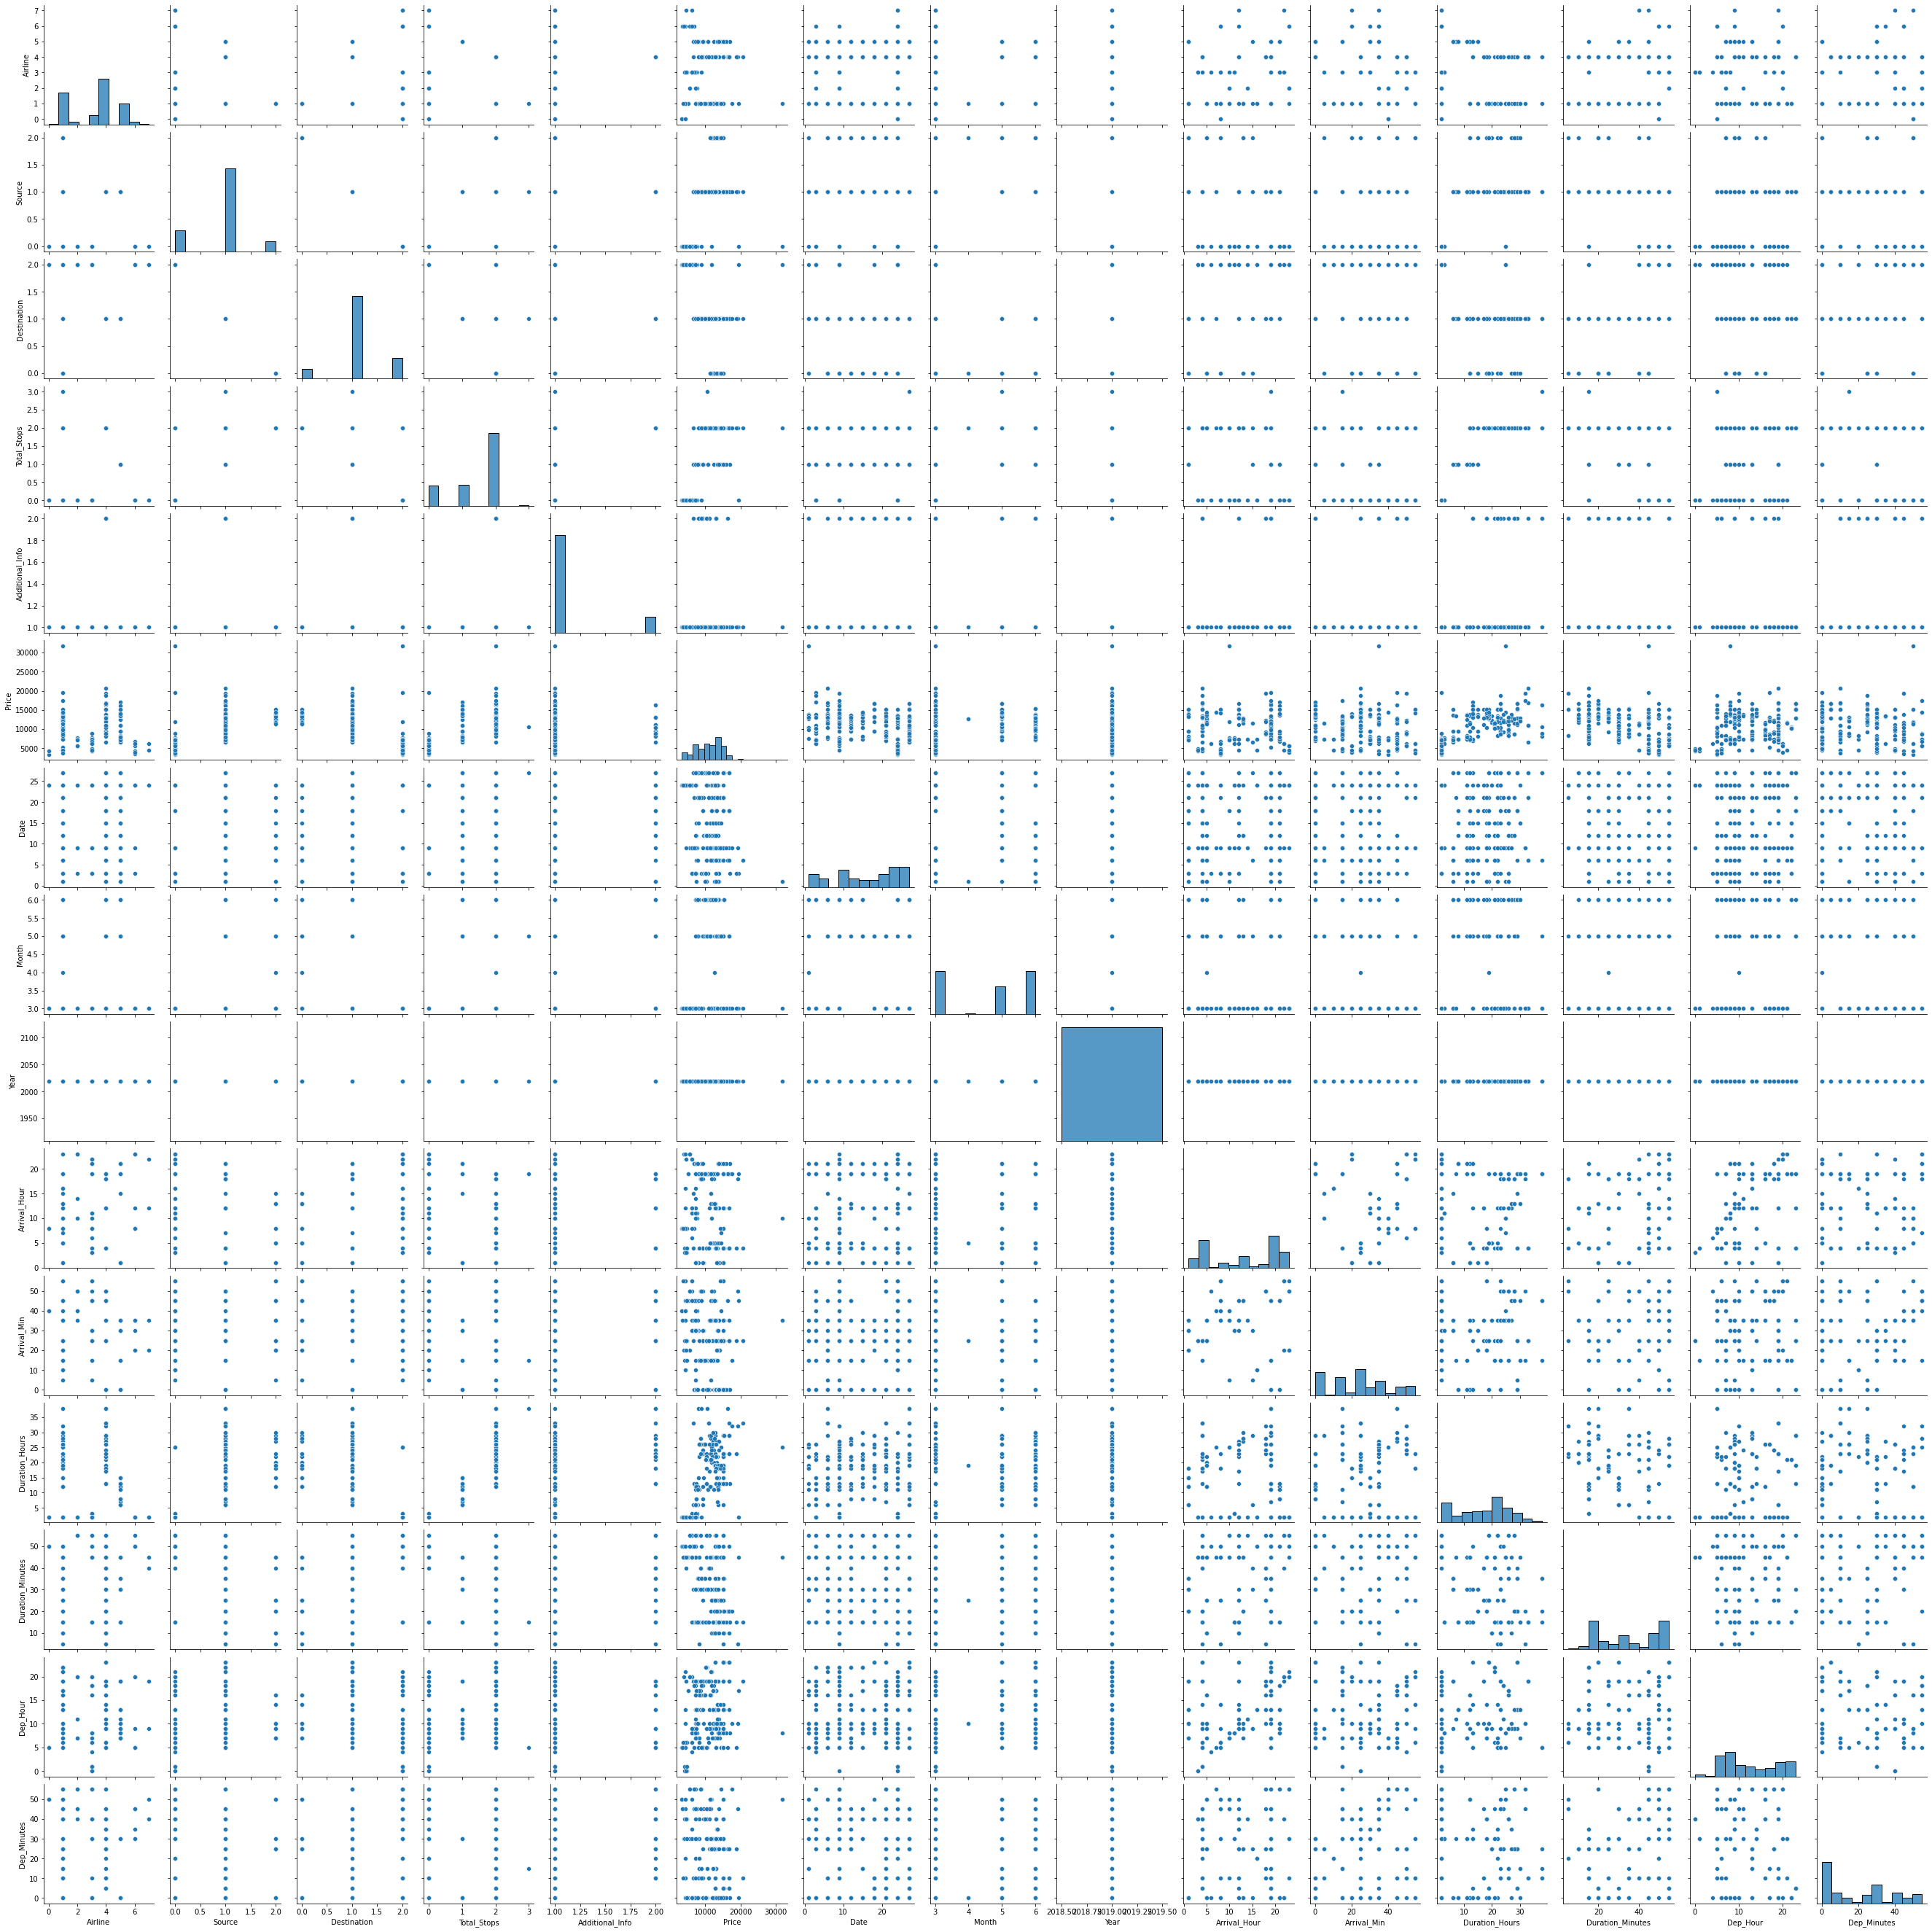

In [60]:
sns.pairplot(final_df,kind="scatter")